In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import cm
from scipy.special import comb

In [2]:
G = nx.drawing.nx_agraph.read_dot('../results/dc2-graph.dot')

In [3]:
plt.style.use('seaborn')
plt.style.use('seaborn-paper')
plt.style.use('tableau-colorblind10')
plt.rcParams.update({
    'figure.figsize': (3.6, 3.),
    'text.usetex': True,    
})

In [4]:
degrees = list(map(lambda d: d[1], G.degree))
max_degree = len(G) - 1
vmin = min(degrees)
vmax = max_degree

min_acceptable_degree = 17

/tmp/ipykernel_78106/5771005.py:39: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(sm, label='Degree')


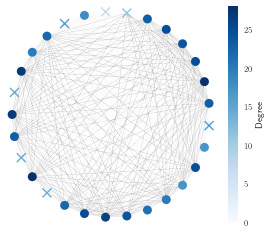

In [5]:
options = {
    "node_size": 80,
    "linewidths": 0,
    "width": 0.1,
}

sm = cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=vmax))

def same(node):
    a, b = node.split('⊆')
    return a.split('::')[1].strip() == b.split('::')[1].strip()

def color_node(node):
    return sm.to_rgba(G.degree(node))

def edge_color(e):
    if same(e[0]) and same(e[1]):
        return '#444444'
    return '#CCCCCC'

def edge_style(e):
    if same(e[0]) and same(e[1]):
        return '-'
    return '--'

accepted_nodes = list(filter(lambda n: G.degree(n) >= min_acceptable_degree, G))
rejected_nodes = list(filter(lambda n: G.degree(n) < min_acceptable_degree, G))

plt.figure()
g = nx.draw(
    G, pos=nx.shell_layout(G), with_labels=False, nodelist=accepted_nodes,
    node_color=list(map(color_node, accepted_nodes)),
    edge_color=list(map(edge_color, G.edges)), style=list(map(edge_style, G.edges)),
    **options
)
nx.draw_networkx_nodes(G, pos=nx.shell_layout(G), nodelist=rejected_nodes,
    node_color=list(map(color_node, rejected_nodes)), node_size=80, node_shape='x'
)
plt.colorbar(sm, label='Degree')
plt.xlim(-1.05,1.05)
plt.ylim(-1.05,1.05)
plt.savefig('/home/aalvarez/Downloads/bad_clique.eps', bbox_inches='tight', pad_inches=0.05)
plt.show()

In [6]:
max_2ind = int(comb(len(G), 2))
print(len(G), "Unary IND")
print(len(G.edges), "Binary IND")
print(max_2ind, "Possible binary IND")
print('Gamma: ', len(G.edges) / max_2ind)

29 Unary IND
301 Binary IND
406 Possible binary IND
Gamma:  0.7413793103448276


In [7]:
true_positives = list(map(same, accepted_nodes))
true_negatives = list(map(lambda n: not same(n), rejected_nodes))
false_positives = list(map(lambda n: not same(n), accepted_nodes))
false_negatives = list(map(same, rejected_nodes))

In [8]:
print('Accuracy', (sum(true_negatives) + sum(true_positives))/len(G))
print('Precision', sum(true_positives) / (sum(true_positives) + sum(false_positives)))
print('Recall', sum(true_positives) / (sum(true_positives) + sum(false_negatives)))

Accuracy 0.8620689655172413
Precision 0.8636363636363636
Recall 0.95


In [9]:
import numpy as np

accuracy = np.zeros(29)
precision = np.zeros_like(accuracy)
recall = np.zeros_like(precision)

for i in range(29):
    accepted_nodes = list(filter(lambda n: G.degree(n) >= i, G))
    rejected_nodes = list(filter(lambda n: G.degree(n) < i, G))
    
    true_positives = list(map(same, accepted_nodes))
    true_negatives = list(map(lambda n: not same(n), rejected_nodes))
    false_positives = list(map(lambda n: not same(n), accepted_nodes))
    false_negatives = list(map(same, rejected_nodes))
    
    accuracy[i] =  (sum(true_negatives) + sum(true_positives))/len(G)
    precision[i] = sum(true_positives) / (sum(true_positives) + sum(false_positives))
    recall[i] = sum(true_positives) / (sum(true_positives) + sum(false_negatives))

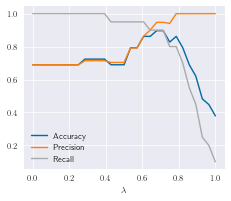

In [10]:
plt.figure()
plt.plot(np.arange(29)/28, accuracy, label='Accuracy')
plt.plot(np.arange(29)/28, precision, label='Precision')
plt.plot(np.arange(29)/28, recall, label='Recall')
plt.xlabel("$\\lambda$")
plt.legend()
plt.show()